In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as NB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

from sklearn import tree
import graphviz 

## I wczytywanie danych

    wczytać dane

In [2]:
dfFullData = pd.read_csv("wine.data", header=None)

## II nazwać kolumny

    nazwać kolumny (korzystając z opisu)

In [3]:
features = [ "Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocynains","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
dfFullData.columns = [ "Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocynains","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
dfFullData

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocynains  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

## III drzewo
    Stworzyć pełne drzewo (liście z elementami jednej klasy)

In [4]:
dfShuffled = dfFullData.sample(frac=1).reset_index(drop=True)
#X_train = dfShuffled.loc[0:88,dfFullData.columns != 'Class']
#y_train = dfShuffled["Class"][0:89]
#X_test = dfShuffled.loc[89:177,dfFullData.columns != 'Class']
#y_test = dfShuffled["Class"][89:178]

fullTree = tree.DecisionTreeClassifier()
#fullTree = fullTree.fit(X=dfFullData.loc[:,dfFullData.columns != 'Class'], y= dfFullData['Class'])
fullTree = fullTree.fit(dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"])

## IV rysowanie
    narysować pełne drzewo

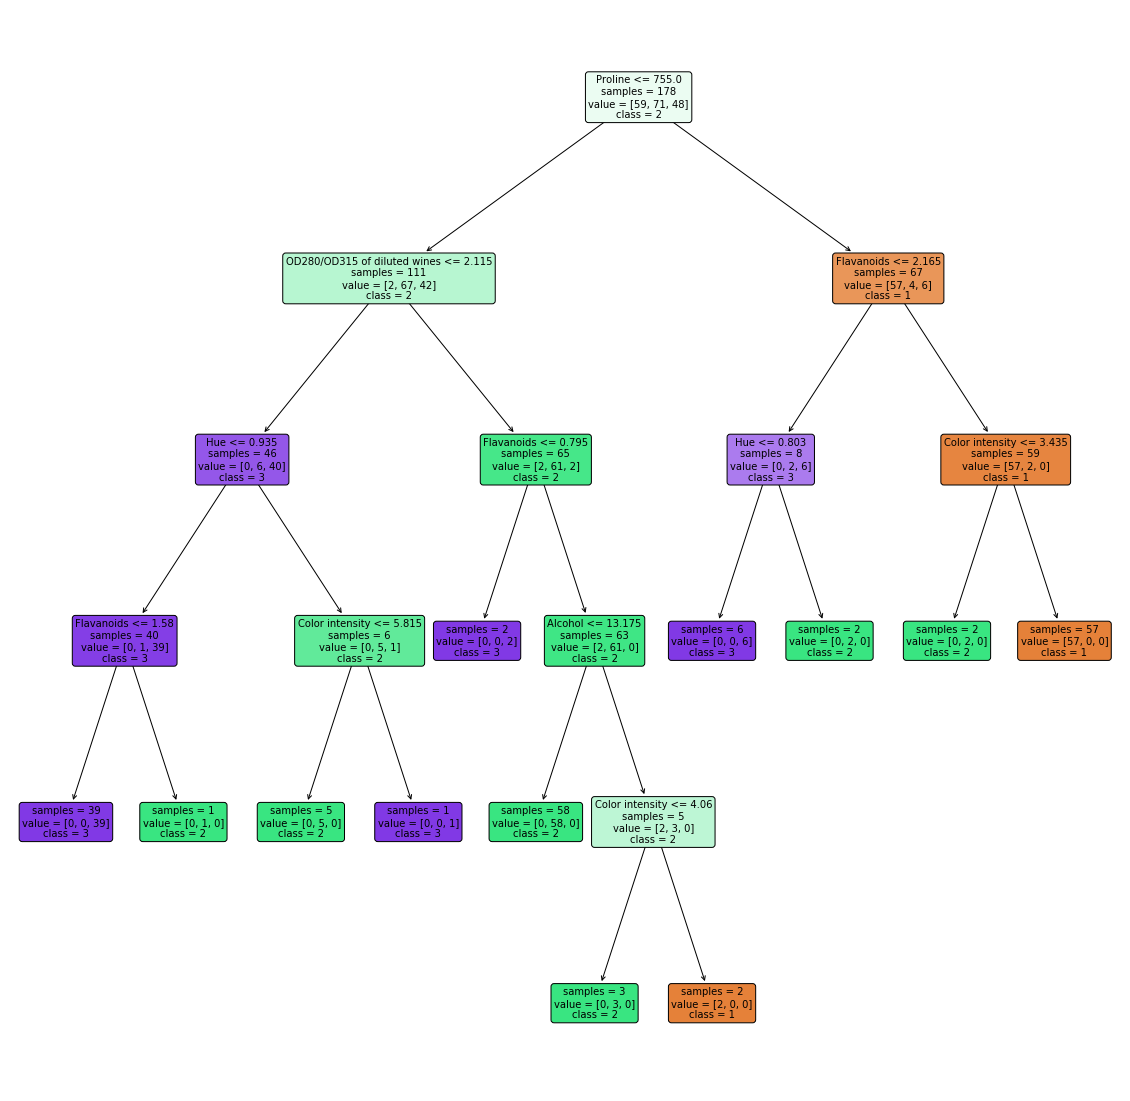

'\ndot_data = tree.export_graphviz(fullTree, out_file=None,\n                               feature_names=features,\n                               class_names=[\'1\',\'2\',\'3\'],\n                               filled=True,rounded=True)\ngraph = graphviz.Source(dot_data) \ngraph.render("iris") \ngraph\n'

In [5]:

plt.subplots(figsize=(20,20))
tree.plot_tree(fullTree,feature_names=features, class_names=['1','2','3'],
               filled=True, rounded=True,fontsize=10,impurity=False)
plt.show()
"""
dot_data = tree.export_graphviz(fullTree, out_file=None,
                               feature_names=features,
                               class_names=['1','2','3'],
                               filled=True,rounded=True)
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph
"""

## V skuteczność
    sprawdzenie skuteczności przez ponowne podstawienie i kroswalidację


In [7]:
predictX = fullTree.predict(X=dfFullData.loc[:,dfFullData.columns != 'Class'])
crossvalidation = cross_validate(fullTree, dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"], cv = 5)
fullTreeAccuracy = crossvalidation['test_score'].mean()
print(fullTreeAccuracy)

0.8987301587301587


## VI optymalne drzewo
za pomocą tabeli cp wybrać drzewo optymalne, narysować je i porównać wyniki jego skuteczności z pełnym drzewem

In [8]:
pruning_path = fullTree.cost_complexity_pruning_path(dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"])
path = fullTree.decision_path(dfFullData.loc[:,dfFullData.columns != 'Class'])

In [9]:
print(pruning_path['ccp_alphas'][:], path.mean())

[0.         0.0093633  0.01087926 0.01095506 0.01685393 0.02111097
 0.02171015 0.03830402 0.06105021 0.20542179 0.2517854 ] 0.20175867122618465


[0.8486817325800375, 0.8486817325800375, 0.8486817325800375, 0.8486817325800375, 0.876647834274953, 0.876647834274953, 0.876647834274953, 0.876647834274953, 0.8088512241054614, 0.775141242937853, 0.6677966101694915] 4 7


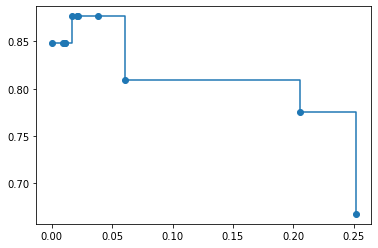

In [10]:
ccp_alphas, impurities = pruning_path.ccp_alphas, pruning_path.impurities
trees = []

for ccp_alpha in ccp_alphas:
    optTree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    optTree.fit(dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"])
    trees.append(optTree)
test_scores = [cross_validate(optTree,dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"], cv=3)['test_score'].mean() for optTree in trees]
plt.plot(ccp_alphas,test_scores, marker='o', drawstyle="steps-post")
max_value = test_scores.index(max(test_scores))
max_index = 0
for i in range(len(test_scores)):
    if (test_scores[i] >= test_scores[max_index]):
        max_index = i
print(test_scores, test_scores.index(max(test_scores)), max_index)

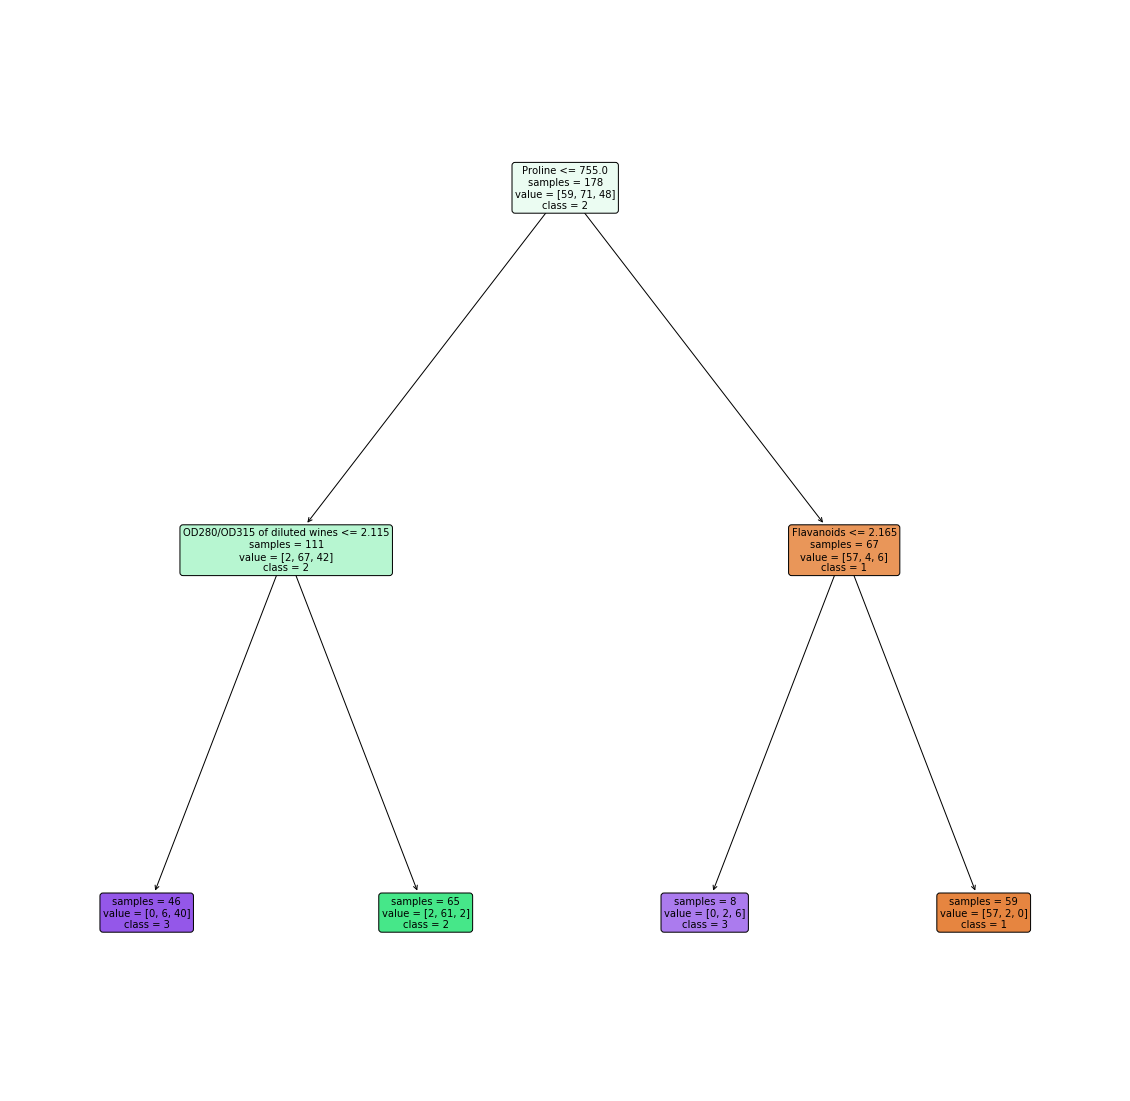

0.04967711361221926


In [11]:
optimalTree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = ( pruning_path['ccp_alphas'][max_index] + pruning_path['ccp_alphas'][max_index+1])/2)
optimalTree = optimalTree.fit(dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"])
plt.subplots(figsize=(20,20))
tree.plot_tree(optimalTree,feature_names=features, class_names=['1','2','3'],
               filled=True, rounded=True,fontsize=10,impurity=False)
plt.show()
print(( pruning_path['ccp_alphas'][max_index] + pruning_path['ccp_alphas'][max_index+1])/2)


In [12]:
var = []
acc = []
size_diff = []


for i in range(12):
    test_scores = []
    variables = i+3
    var.append(variables-1)
    X_less = dfFullData.iloc[:,1:variables]
    y_less = dfFullData["Class"]
    
    lessTree = tree.DecisionTreeClassifier()
    lessTree = lessTree.fit(X_less, y_less)
    
    pruning_path = lessTree.cost_complexity_pruning_path(X_less, y_less)

    ccp_alphas, impurities = pruning_path.ccp_alphas, pruning_path.impurities
    trees = []

    for ccp_alpha in ccp_alphas:
        optTree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        optTree.fit(X_less, y_less)
        trees.append(optTree)
        test_scores.append(cross_validate(optTree,X_less, y_less, cv=3)['test_score'].mean())
    
    #print("test_scores=",test_scores,"ccp_alphas=", ccp_alphas)
    plt.plot(ccp_alphas,test_scores, marker='o', drawstyle="steps-post")
    max_value = test_scores.index(max(test_scores))
    max_index = 0
    for i in range(len(test_scores)):
        if (test_scores[i] >= test_scores[max_index]):
            max_index = i
    #print("max_value=",test_scores.index(max(test_scores)),"index=", max_index)
    optimalTree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = ( pruning_path['ccp_alphas'][max_index] + pruning_path['ccp_alphas'][max_index+1])/2)
    optimalTree = optimalTree.fit(dfFullData.loc[:,dfFullData.columns != 'Class'], dfFullData["Class"])
    acc.append(cross_validate(optimalTree,X_less, y_less, cv=3)['test_score'].mean())
    size_diff.append(lessTree.get_depth() - optimalTree.get_depth())
    print("Skuteczność drzewa optymalnego (",variables-1," zmiennych)=",cross_validate(optimalTree,X_less, y_less, cv=3)['test_score'].mean())

Skuteczność drzewa optymalnego ( 2  zmiennych)= 0.8095103578154426
Skuteczność drzewa optymalnego ( 3  zmiennych)= 0.8095103578154426
Skuteczność drzewa optymalnego ( 4  zmiennych)= 0.8036723163841808
Skuteczność drzewa optymalnego ( 5  zmiennych)= 0.8036723163841808
Skuteczność drzewa optymalnego ( 6  zmiennych)= 0.8318267419962334
Skuteczność drzewa optymalnego ( 7  zmiennych)= 0.8652542372881357
Skuteczność drzewa optymalnego ( 8  zmiennych)= 0.87090395480226
Skuteczność drzewa optymalnego ( 9  zmiennych)= 0.8822033898305085
Skuteczność drzewa optymalnego ( 10  zmiennych)= 0.8933145009416196
Skuteczność drzewa optymalnego ( 11  zmiennych)= 0.8650659133709983
Skuteczność drzewa optymalnego ( 12  zmiennych)= 0.8370998116760829
Skuteczność drzewa optymalnego ( 13  zmiennych)= 0.876647834274953


In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(var, acc,'bo')
ax[0].set_xlabel("liczba zmiennych")
ax[0].set_ylabel("skuteczność")
ax[0].set_title("Zależność skuteczności od liczby zmiennych")
ax[1].plot(var, size_diff, 'go')
ax[1].set_xlabel("liczba zmiennych")
ax[1].set_ylabel("wielkość pełnego - wielkość optymalnego")
ax[1].set_title("Zależność różnicy między wielkością pełnego a optymalnego drzewa od liczby zmiennych")
fig.tight_layout()
